<a href="https://colab.research.google.com/github/amalabderrahmani/Colab_Project/blob/main/Predict_health_costs_with_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


In this challenge,  healthcare costs will be predicted using a regression algorithm.

A dataset that contains information about different people including their healthcare costs is given and the data will be used to predict healthcare costs based on new data.

The first two cells of this notebook import libraries and the data.


To pass the challenge, `model.evaluate` must return a Mean Absolute Error of under 3500. This means it predicts health care costs correctly within $3500.

The final cell will also predict expenses using the `test_dataset` and graph the results.

In [ ]:
# Import libraries. You may or may not use all of these.
!pip install -q git+https://github.com/tensorflow/docs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

import os

In [ ]:
# Import data
!wget https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
dataset = pd.read_csv('insurance.csv')
dataset.tail()

--2022-04-11 01:24:59--  https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 104.26.3.33, 172.67.70.149, 104.26.2.33, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|104.26.3.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50264 (49K) [text/csv]
Saving to: ‘insurance.csv’

insurance.csv       100%[===================>]  49.09K  --.-KB/s    in 0s      

2022-04-11 01:24:59 (102 MB/s) - ‘insurance.csv’ saved [50264/50264]



,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


# Convert Categorical data to numbers


In [ ]:
CATEGORICAL_COLUMNS = ['sex', 'smoker', 'region']
NUMERIC_COLUMNS = ['age','bmi', 'children']

dataset = pd.get_dummies(dataset, columns=['sex'], prefix='', prefix_sep='')
dataset = pd.get_dummies(dataset, columns=['smoker'], prefix='', prefix_sep='')
dataset = pd.get_dummies(dataset, columns=['region'], prefix='', prefix_sep='')
dataset.tail()

,age,bmi,children,expenses,female,male,no,yes,northeast,northwest,southeast,southwest
1333,50,31.0,3,10600.55,0,1,1,0,0,1,0,0
1334,18,31.9,0,2205.98,1,0,1,0,1,0,0,0
1335,18,36.9,0,1629.83,1,0,1,0,0,0,1,0
1336,21,25.8,0,2007.95,1,0,1,0,0,0,0,1
1337,61,29.1,0,29141.36,1,0,0,1,0,1,0,0


# Defining train and test features and labels

In [ ]:
train_dataset = dataset.sample(frac=0.8, random_state=25)
test_dataset = dataset.drop(train_dataset.index)
train_labels = train_dataset.pop('expenses')
test_labels = test_dataset.pop('expenses')


In [ ]:
train_dataset.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
age,1070.0,38.958879,14.040573,18.0,26.0,39.0,51.00,64.0
bmi,1070.0,30.564953,6.080644,16.0,26.2,30.4,34.40,53.1
children,1070.0,1.086916,1.195923,0.0,0.0,1.0,2.00,5.0
female,1070.0,0.495327,0.500212,0.0,0.0,0.0,1.00,1.0
male,1070.0,0.504673,0.500212,0.0,0.0,1.0,1.00,1.0
no,1070.0,0.794393,0.404334,0.0,1.0,1.0,1.00,1.0
yes,1070.0,0.205607,0.404334,0.0,0.0,0.0,0.00,1.0
northeast,1070.0,0.245794,0.430759,0.0,0.0,0.0,0.00,1.0
northwest,1070.0,0.230841,0.421568,0.0,0.0,0.0,0.00,1.0
southeast,1070.0,0.272897,0.445657,0.0,0.0,0.0,1.00,1.0


#### Normalizing the train_dataset

In [ ]:
#train_dataset.describe().transpose()[['mean', 'std']]


,mean,std
age,38.958879,14.040573
bmi,30.564953,6.080644
children,1.086916,1.195923
female,0.495327,0.500212
male,0.504673,0.500212
no,0.794393,0.404334
yes,0.205607,0.404334
northeast,0.245794,0.430759
northwest,0.230841,0.421568
southeast,0.272897,0.445657


# Creating the model

In [ ]:
#normalizer = tf.keras.layers.Normalization(axis=-1)
#normalizer.adapt(np.array(train_dataset))
model = tf.keras.Sequential([
    #layers.Input(shape=(11, )),
    layers.Dense(15, input_dim=11,  use_bias=True),
    layers.Dense(units=1, activation='linear', use_bias=True)
])


model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.01),
    loss="mae", 
    metrics=["mae", 'mse']
    )

# Training the model

In [ ]:
checkpoint_path = "training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

In [ ]:
history = model.fit(
    train_dataset,
    train_labels,
    epochs=50,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2,
    callbacks=[cp_callback])


Epoch 1: saving model to training_1/cp.ckpt

Epoch 2: saving model to training_1/cp.ckpt

Epoch 3: saving model to training_1/cp.ckpt

Epoch 4: saving model to training_1/cp.ckpt

Epoch 5: saving model to training_1/cp.ckpt

Epoch 6: saving model to training_1/cp.ckpt

Epoch 7: saving model to training_1/cp.ckpt

Epoch 8: saving model to training_1/cp.ckpt

Epoch 9: saving model to training_1/cp.ckpt

Epoch 10: saving model to training_1/cp.ckpt

Epoch 11: saving model to training_1/cp.ckpt

Epoch 12: saving model to training_1/cp.ckpt

Epoch 13: saving model to training_1/cp.ckpt

Epoch 14: saving model to training_1/cp.ckpt

Epoch 15: saving model to training_1/cp.ckpt

Epoch 16: saving model to training_1/cp.ckpt

Epoch 17: saving model to training_1/cp.ckpt

Epoch 18: saving model to training_1/cp.ckpt

Epoch 19: saving model to training_1/cp.ckpt

Epoch 20: saving model to training_1/cp.ckpt

Epoch 21: saving model to training_1/cp.ckpt

Epoch 22: saving model to training_1/cp.ck

In [ ]:
model.load_weights(checkpoint_path)

# Evalutation and Testing

9/9 - 0s - loss: 3359.6533 - mae: 3359.6533 - mse: 46682652.0000 - 41ms/epoch - 5ms/step
Testing set Mean Abs Error: 3359.65 expenses
You passed the challenge. Great job!


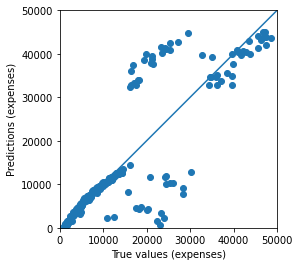

In [ ]:
# RUN THIS CELL TO TEST YOUR MODEL. DO NOT MODIFY CONTENTS.
# Test model by checking how well the model generalizes using the test set.
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)
